In [42]:
import sys
sys.path.insert(0,'../')
import os
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints

In [43]:
num_class=14
num_stack=2
model_dir="../../trained_models/mpii_new"
model_json="net_arch.json"
epoch=25
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)

000033016.jpg
[(300.0, 157.5, 0.012866566), (460.0, 168.75, 0.0073365215), (580.0, 247.5, 0.0061145434), (840.0, 416.25, 0.0049366057), (300.0, 157.5, 0.007917872), (300.0, 157.5, 0.011731365), (140.0, 33.75, 0.008016137), (140.0, 33.75, 0.009093977), (260.0, 11.25, 0.0124729), (620.0, 11.25, 0.013410544), (260.0, 67.5, 0.009542134), (220.0, 78.75, 0.0050054784), (620.0, 11.25, 0.012731284), (580.0, 11.25, 0.0177304)]


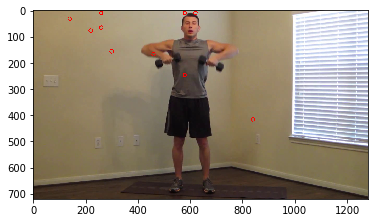

yoga2.jpg
[(174.375, 163.59375, 0.031531624), (174.375, 119.96875, 0.033996195), (184.0625, 119.96875, 0.039110295), (213.125, 109.0625, 0.02871639), (242.1875, 163.59375, 0.027537394), (135.625, 332.640625, 0.026331222), (174.375, 119.96875, 0.03364507), (174.375, 114.515625, 0.035115514), (203.4375, 98.15625, 0.038053595), (261.5625, 92.703125, 0.034521084), (310.0, 119.96875, 0.032809507), (280.9375, 114.515625, 0.027130228), (203.4375, 98.15625, 0.04802762), (203.4375, 98.15625, 0.035981193)]


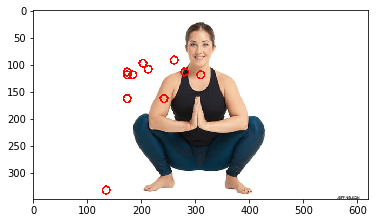

im00001.jpg
[(88.3125, 96.796875, 0.027915746), (90.765625, 93.515625, 0.026009325), (90.765625, 93.515625, 0.020114774), (90.765625, 93.515625, 0.013600376), (90.765625, 93.515625, 0.02425468), (88.3125, 100.078125, 0.02522812), (80.953125, 54.140625, 0.014217231), (80.953125, 55.78125, 0.015883222), (100.578125, 63.984375, 0.018061714), (117.75, 54.140625, 0.01893981), (117.75, 73.828125, 0.016011156), (117.75, 73.828125, 0.010912975), (110.390625, 62.34375, 0.02381628), (112.84375, 54.140625, 0.022827264)]


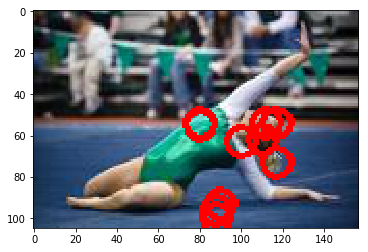

yoga1.jpg
[(251.875, 494.0625, 0.04105442), (232.5, 387.5, 0.034478106), (203.4375, 290.625, 0.04069385), (213.125, 290.625, 0.031638276), (271.25, 387.5, 0.03453503), (271.25, 387.5, 0.04062419), (145.3125, 329.375, 0.03355238), (145.3125, 329.375, 0.03749941), (164.6875, 164.6875, 0.041738834), (232.5, 164.6875, 0.040921558), (310.0, 300.3125, 0.030352121), (310.0, 310.0, 0.024622876), (174.375, 164.6875, 0.06413704), (164.6875, 145.3125, 0.061037242)]


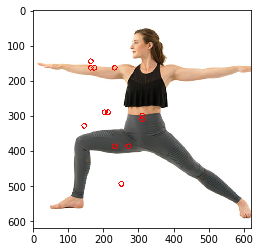

sample.jpg
[(303.75, 1125.0, 0.04448015), (337.5, 652.5, 0.044605296), (337.5, 652.5, 0.04224961), (472.5, 607.5, 0.03190874), (455.625, 675.0, 0.03931602), (303.75, 1125.0, 0.037560966), (236.25, 495.0, 0.040819775), (236.25, 405.0, 0.044122033), (236.25, 382.5, 0.04072801), (405.0, 382.5, 0.03411586), (641.25, 382.5, 0.030880574), (371.25, 652.5, 0.026548274), (405.0, 382.5, 0.047382947), (371.25, 135.0, 0.045567896)]


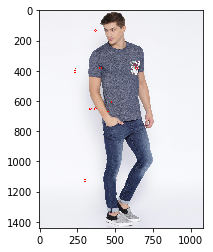

In [52]:
img_dir="../../data/test_images"

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    imgdata = imageio.imread(img_file)
    out,scale = xnet.inference_rgb(imgdata, imgdata.shape)

    kps = post_process_heatmap(out[0,:,:,:])
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.002)
    plt.imshow(cvmat)
    plt.show()
